In [1]:
from one.api import ONE
from ibllib.atlas.regions import BrainRegions
import pandas as pd
import numpy as np

In [2]:
one = ONE(base_url='https://openalyx.internationalbrainlab.org', password='international', silent=True)

In [3]:
eids, info = one.search(dataset='probes.description', details=True)

In [4]:
len(eids)

374

In [5]:
brain_locs = []
for eid in eids:
    try:
        brain_loc = one.load_dataset(eid, '*channels.brainLocationIds_ccf_2017.npy')
        brain_locs.append({"eid": eid, "brain_locs": list(np.unique(brain_loc))})
        #print(np.unique(brain_loc))
    except:
        pass
        #print("Experiment", eid, "does not have a brain location id.")


local md5 mismatch on dataset: cortexlab/Subjects/KS074/2021-11-22/001/alf/probe00/pykilosort/channels.brainLocationIds_ccf_2017.npy
/home/maria/Downloads/ONE/openalyx.internationalbrainlab.org/cortexlab/Subjects/KS074/2021-11-22/001/alf/probe00/pykilosort/channels.brainLocationIds_ccf_2017.npy: 100%|██████████| 3.20k/3.20k [00:00<00:00, 6.66kB/s]


In [6]:
#Extract unique list
brain_areas=[]
for b in brain_locs:
    brain_areas+=(b["brain_locs"])
print(brain_areas)
brain_areas=np.unique(brain_areas)
brain_ind={}
j=0
for b in brain_areas:
    brain_ind[b]=j
    j+=1
    
print(brain_ind)

[81, 263, 266, 351, 477, 523, 672, 940, 1021, 1085, 1097, 1108, 1109, 0, 186, 320, 362, 463, 466, 483, 603, 632, 648, 844, 940, 943, 997, 1021, 1085, 10703, 484682516, 382, 463, 579, 632, 663, 780, 10703, 10704, 382, 543, 632, 663, 664, 727, 743, 1089, 10703, 10704, 484682470, 0, 187, 657, 694, 800, 878, 950, 961, 974, 1101, 0, 128, 218, 313, 325, 374, 381, 422, 549, 916, 924, 997, 1009, 1088, 10703, 560581563, 563807435, 382, 423, 463, 466, 566, 579, 698, 703, 966, 10703, 108, 145, 202, 728, 744, 984, 1091, 128, 215, 218, 313, 382, 433, 466, 632, 916, 971, 997, 1046, 1066, 10703, 10704, 312782554, 312782558, 312782562, 312782566, 312782570, 484682520, 28, 139, 382, 423, 466, 566, 579, 952, 961, 971, 96, 153, 512, 728, 846, 1007, 1049, 33, 128, 215, 218, 305, 313, 382, 466, 632, 721, 778, 916, 971, 997, 1009, 1029, 10703, 10704, 484682520, 155, 218, 362, 366, 463, 549, 575, 830, 907, 1077, 1089, 1097, 10703, 2, 477, 672, 698, 703, 961, 974, 1102, 484682512, 484682516, 84, 477, 597, 698

In [7]:
def alloc_matrix2d(W,H):
    """ Pre-allocate a 2D matrix of empty lists. """
    return [ [ [] for i in range(W) ] for j in range(H) ]

matrix=alloc_matrix2d(len(brain_ind.keys()), len(brain_ind.keys()))

In [8]:
for b in brain_locs:
    for l in b["brain_locs"]:
        for k in b["brain_locs"]:
            if l!=k:
                pos1=brain_ind[l]
                pos2=brain_ind[k]
                matrix[pos1][pos2].append(b["eid"])

In [10]:
print(matrix[:5][:])

[[[], [], ['66d98e6e-bcd9-4e78-8fbb-636f7e808b29'], ['413a6825-2144-4a50-b3fc-cf38ddd6fd1a'], ['e5fae088-ed96-4d9b-82f9-dfd13c259d52'], ['1b61b7f2-a599-4e40-abd6-3e758d2c9e25', '21d21fc3-4201-4edc-802a-c67b61952548', 'a71175be-d1fd-47a3-aa93-b830ea3634a1', '90d1e82c-c96f-496c-ad4e-ee3f02067f25'], [], ['1b61b7f2-a599-4e40-abd6-3e758d2c9e25', '21d21fc3-4201-4edc-802a-c67b61952548', 'a71175be-d1fd-47a3-aa93-b830ea3634a1', '90d1e82c-c96f-496c-ad4e-ee3f02067f25'], ['8ca740c5-e7fe-430a-aa10-e74e9c3cbbe8'], [], ['21d21fc3-4201-4edc-802a-c67b61952548'], [], [], ['58b1e920-cfc8-467e-b28b-7654a55d0977', 'a19c7a3a-7261-42ce-95d5-1f4ca46007ed', '90d1e82c-c96f-496c-ad4e-ee3f02067f25'], [], ['c51f34d8-42f6-4c9c-bb5b-669fd9c42cd9'], ['21d21fc3-4201-4edc-802a-c67b61952548'], ['3e7ae7c0-fe8b-487c-9354-036236fa1010'], ['8ca740c5-e7fe-430a-aa10-e74e9c3cbbe8', 'ff48aa1d-ef30-4903-ac34-8c41b738c1b9'], [], [], [], [], [], [], [], [], ['6bb5da8f-6858-4fdd-96d9-c34b3b841593', '413a6825-2144-4a50-b3fc-cf38ddd6

In [11]:
print(len(matrix))

448


In [12]:
n_matrix=alloc_matrix2d(len(brain_ind.keys()), len(brain_ind.keys()))
for j in range(len(brain_ind.keys())):
    for i in range(len(brain_ind.keys())):
                 n_matrix[j][i]=len(matrix[j][i])

In [15]:
print(len(n_matrix))

448


(array([1.9964e+05, 6.5200e+02, 1.6000e+02, 9.2000e+01, 1.0400e+02,
        2.2000e+01, 1.6000e+01, 8.0000e+00, 6.0000e+00, 4.0000e+00]),
 array([ 0. ,  5.2, 10.4, 15.6, 20.8, 26. , 31.2, 36.4, 41.6, 46.8, 52. ]),
 <BarContainer object of 10 artists>)

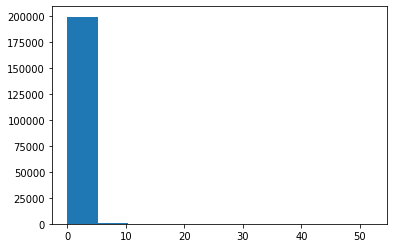

In [21]:
import matplotlib.pyplot as plt
eids_len=[]
for j in range(len(n_matrix)):
    for i in range(len(n_matrix)):
        eids_len.append(len(matrix[j][i]))
plt.hist(eids_len)

[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]]
[11 12 15 11 17 14 11 11 21 16 11 11 21 12 17 11 32 12 30 13 29 12 15 21
 27 19 33 29 21 22 23 23 23 22 12 11 21 12 15 12 11 15 16 29 15 14 12 15
 32 12 12 24 52 18 38 13 18 16 27 41 11 22 43 33 12 23 23 24 23 23 11 32
 12 12 14 11 12 24 12 30 11 14 14 14 20 13 20 11 11 11 17 30 15 52 14 30
 20 39 15 18 16 20 27 49 12 22 44 31 11 22 22 23 22 22 12 15 35 12 13 18
 11 20 14 14 24 20 11 16 11 14 29 12 38 14 39 14 18 14 21 33 11 17 44 35
 11 22 21 23 22 22 25 12 12 13 11 12 11 12 13 14 15 12 12 11 12 11 15 15
 18 18 18 12 21 11 21 14 19 11 16 12 12 11 13 12 12 16 16 20 14 12 20 14
 20 11 21 27 14 27 14 21 20 15 23 20 19 19 20 19 19 18 21 17 27 29 41 20
 49 24 33 12 21 12 20 20 16 20 40 25 18 19 20 20 20 20 19 31 11 12 11 11
 16 13 15 19 22 13 22 17 12 15 20 19 16 13 15 15 14 14 11 12 12 11 16 33
 15 43 20 44 20 44 11 21 11 14 23 40 13 19 35 11 23 22 24 23 23 28 29 33
 11 

<AxesSubplot:>

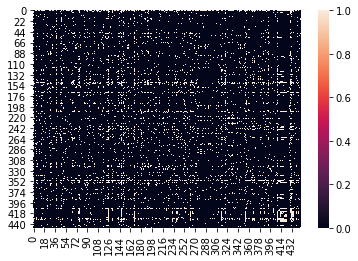

In [42]:
co_mat=np.array(n_matrix)
print(co_mat)
print(co_mat[co_mat>10])
print(np.nonzero(co_mat>10))
co_mat[co_mat>1]=1
import seaborn as sbs
sns.heatmap(co_mat)